# **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import collections
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from IPython.core.interactiveshell import InteractiveShell
import warnings

#importing packages for modeling
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

In [2]:
target_names=['0', '1']

# **Functions**

In [3]:
def evaluation_metrics(y_test, y_pre, target_names):
    #scores
    print("Accuracy :",accuracy_score(y_test,y_pre))
    print("Precision :",precision_score(y_test,y_pre))
    print("Recall :",recall_score(y_test,y_pre))
    print("F1 Score :",f1_score(y_test,y_pre))

    print(classification_report(y_test, y_pre, target_names=target_names))

    #AUC
    fpr, tpr, _ = roc_curve(y_test,  y_pre)
    auc = roc_auc_score(y_test, y_pre)
    print("AUC :", auc)

    #ROC
    plt.plot(fpr,tpr,label="uc={:.3f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()

    #CM matrix
    matrix = confusion_matrix(y_test, y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)

    sns.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

In [4]:
def logistic(X_train,X_test,y_train,y_test):
    model=LogisticRegression()
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)

In [5]:
def Ridge(X_train,X_test,y_train,y_test):
    #train the model
    model = RidgeClassifier(random_state=2)
    model.fit(X_train, y_train)
    #predictions
    y_pre = model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)

In [6]:
def SGD(X_train,X_test,y_train,y_test):
    #train the model
    model = SGDClassifier()
    model.fit(X_train, y_train)
    #predictions
    y_pre = model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)

In [7]:
def XGBOOST(X_train,X_test,y_train,y_test):
  #train the model
  model = XGBClassifier(random_state=2)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [8]:
def RF(X_train,X_test,y_train,y_test):
  #train the model
  model = RandomForestClassifier(random_state=2)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [9]:
def Bagging(X_train,X_test,y_train,y_test):
  #train the model
  model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [10]:
def AdaBoost(X_train,X_test,y_train,y_test):
  #train the model
  model = AdaBoostClassifier(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [11]:
def ExtraTrees(X_train,X_test,y_train,y_test):
  #train the model
  model = ExtraTreesClassifier(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [12]:
def GradientBoosting(X_train,X_test,y_train,y_test):
  #train the model
  model = GradientBoostingClassifier(n_estimators = 600, max_depth = 20, min_samples_split = 4,learning_rate = 0.01, criterion='mse')
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [13]:
def Stacking(X_train,X_test,y_train,y_test):
  #train the model
  estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
  model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [14]:
def MLP(X_train,X_test,y_train,y_test):
  #train the model
  mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
  mlp.fit(X_train, y_train)
  mlp.get_params(deep=True)
  #predictions
  y_pre = mlp.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

In [15]:
def MNN(X_train,X_test,y_train,y_test):
  #train the model
  model = Sequential()
  model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(16, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(8, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(4, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(1, activation='sigmoid'))

  opt = tf.keras.optimizers.Adam(learning_rate=0.0001) #optimizer

  model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) #metrics

  earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='auto', baseline=None, restore_best_weights=False)

  history = model.fit(X_train.values, y_train.values, epochs = 8, batch_size=10, validation_split = 0.20, verbose = 1, callbacks = [earlystopper])
  history_dict = history.history

  loss_values = history_dict['loss']
  val_loss_values=history_dict['val_loss']
  plt.plot(loss_values,'b',label='training loss')
  plt.plot(val_loss_values,'r',label='val training loss')
  plt.legend()
  plt.xlabel("Epochs")
  plt.show()  

  accuracy_values = history_dict['accuracy']
  val_accuracy_values=history_dict['val_accuracy']
  plt.plot(val_accuracy_values,'-r',label='val_accuracy')
  plt.plot(accuracy_values,'-b',label='accuracy')
  plt.legend()
  plt.xlabel("Epochs")
  plt.show()

  #predictions
  y_pre = model.predict_classes(X_test)

  evaluation_metrics(y_test, y_pre, target_names)

# **Reading data**

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", header=None)

In [17]:
df.columns = ["A", "B", "C", "D", "E", "F", "G", "H", "target"]

# **Data Understanding**

### **Init**

In [18]:
df.head()

,A,B,C,D,E,F,G,H,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.shape

(768, 9)

In [20]:
df.dtypes

A           int64
B           int64
C           int64
D           int64
E           int64
F         float64
G         float64
H           int64
target      int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       768 non-null    int64  
 1   B       768 non-null    int64  
 2   C       768 non-null    int64  
 3   D       768 non-null    int64  
 4   E       768 non-null    int64  
 5   F       768 non-null    float64
 6   G       768 non-null    float64
 7   H       768 non-null    int64  
 8   target  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Make the dataset imbalance with 10% of the True (1) label**

In [22]:
classes=df["target"].value_counts()
true_ones=round(classes[0]/df["target"].count()*100,2)
false_ones=round(classes[1]/df["target"].count()*100, 2)
print("False : {} %".format(true_ones))
print("True : {} %".format(false_ones))

False : 65.1 %
True : 34.9 %


In [23]:
df[df["target"] == 1].shape[0], df["target"].shape[0]

(268, 768)

In [24]:
remove_n = round((df[df["target"] == 1].shape[0] - df["target"].shape[0]*0.1) / 0.9)
remove_n

212

In [25]:
np.random.seed(10)
drop_indices = np.random.choice(df[df["target"] == 1].index, remove_n, replace=False)
df = df.drop(drop_indices)

In [26]:
df = df.reindex(sorted(df.columns), axis=1)
df = df.reset_index(drop=True)
df.head()

,A,B,C,D,E,F,G,H,target
0,1,85,66,29,0,26.6,0.351,31,0
1,1,89,66,23,94,28.1,0.167,21,0
2,5,116,74,0,0,25.6,0.201,30,0
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0


In [27]:
classes=df["target"].value_counts()
true_ones=round(classes[0]/df["target"].count()*100,2)
false_ones=round(classes[1]/df["target"].count()*100, 2)
print("False : {} %".format(true_ones))
print("True : {} %".format(false_ones))

False : 89.93 %
True : 10.07 %


## **Missing Values**

In [28]:
df.isnull().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
target    0
dtype: int64

## **Outlier Analysis**

### ***A***

In [29]:
fig = px.histogram(df, x="A",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [30]:
print("skweness: ",df["A"].skew())
print("Kurtosis: ",df["A"].kurt())

skweness:  1.0488812300857546
Kurtosis:  0.48068892028550714


In [31]:
#standardizing dexa_freq_during_rx df
scaled = StandardScaler().fit_transform(df['A'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.10035344]
 [-1.10035344]
 [-1.10035344]
 [-1.10035344]
 [-1.10035344]
 [-1.10035344]
 [-1.10035344]
 [-1.10035344]
 [-1.10035344]
 [-1.10035344]]

outer range (high) of the distribution:
[[2.77381974]
 [2.77381974]
 [2.77381974]
 [3.0966675 ]
 [3.0966675 ]
 [3.0966675 ]
 [3.0966675 ]
 [3.0966675 ]
 [3.0966675 ]
 [3.0966675 ]]


In [32]:
scaler = RobustScaler()
df['A'] = scaler.fit_transform(df['A'].values.reshape(-1,1))

In [33]:
''' Detection '''
# IQR
Q1 = np.percentile(df['A'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['A'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['A'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['A'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (556, 9)
lower []
Upper [ 11  14  22  48  61 195 226 233 251 308 372 404 405 424 481 536 540 541]


' Removing the Outliers '

New Shape:  (538, 9)


### ***B***

In [34]:
fig = px.histogram(df, x="B",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [35]:
print("skweness: ",df["B"].skew())
print("Kurtosis: ",df["B"].kurt())

skweness:  0.37506656191632587
Kurtosis:  1.42694213843636


In [36]:
#standardizing dexa_freq_during_rx df
scaled = StandardScaler().fit_transform(df['B'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-3.9389385 ]
 [-3.9389385 ]
 [-3.9389385 ]
 [-2.41444571]
 [-1.99867495]
 [-1.96402739]
 [-1.96402739]
 [-1.82543714]
 [-1.79078958]
 [-1.68684689]]

outer range (high) of the distribution:
[[2.67874608]
 [2.74804121]
 [2.74804121]
 [2.78268877]
 [2.78268877]
 [2.8519839 ]
 [2.8519839 ]
 [2.88663146]
 [2.88663146]
 [2.95592659]]


In [37]:
scaler = RobustScaler()
df['B'] = scaler.fit_transform(df['B'].values.reshape(-1,1))

In [38]:
''' Detection '''
# IQR
Q1 = np.percentile(df['B'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['B'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['B'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['B'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (538, 9)
lower [ 37  47 127 231]
Upper [ 10  20 106 130 144 155 179 180 215 217 243 274 280 340 384 418 437 468
 530]


' Removing the Outliers '

New Shape:  (515, 9)


### ***C***

In [39]:
fig = px.histogram(df, x="C",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [40]:
print("skweness: ",df["C"].skew())
print("Kurtosis: ",df["C"].kurt())

skweness:  -1.768065100040566
Kurtosis:  5.637311121680151


In [41]:
#standardizing dexa_freq_during_rx df
scaled = StandardScaler().fit_transform(df['C'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-3.79742823]
 [-3.79742823]
 [-3.79742823]
 [-3.79742823]
 [-3.79742823]
 [-3.79742823]
 [-3.79742823]
 [-3.79742823]
 [-3.79742823]
 [-3.79742823]]

outer range (high) of the distribution:
[[1.5375964 ]
 [1.64874275]
 [1.75988909]
 [1.75988909]
 [1.87103544]
 [2.09332813]
 [2.20447448]
 [2.20447448]
 [2.31562083]
 [2.98249891]]


In [42]:
scaler = RobustScaler()
df['C'] = scaler.fit_transform(df['C'].values.reshape(-1,1))

In [43]:
''' Detection '''
# IQR
Q1 = np.percentile(df['C'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['C'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['C'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['C'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (515, 9)
lower [  3   7  24  33  48 114 141 215 222 275 277 292 326 347 357 395 400 401
 403 434 468 473]
Upper [ 51  69 118 230 237 452]


' Removing the Outliers '

New Shape:  (487, 9)


### ***D***

In [44]:
fig = px.histogram(df, x="D",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [45]:
print("skweness: ",df["D"].skew())
print("Kurtosis: ",df["D"].kurt())

skweness:  -0.04600949134151385
Kurtosis:  -0.9978896731824993


In [46]:
#standardizing dexa_freq_during_rx df
scaled = StandardScaler().fit_transform(df['D'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.39362548]
 [-1.39362548]
 [-1.39362548]
 [-1.39362548]
 [-1.39362548]
 [-1.39362548]
 [-1.39362548]
 [-1.39362548]
 [-1.39362548]
 [-1.39362548]]

outer range (high) of the distribution:
[[1.86150934]
 [1.86150934]
 [1.99713995]
 [1.99713995]
 [1.99713995]
 [2.06495526]
 [2.13277057]
 [2.13277057]
 [2.26840119]
 [2.67529304]]


In [47]:
scaler = RobustScaler()
df['D'] = scaler.fit_transform(df['D'].values.reshape(-1,1))

In [48]:
''' Detection '''
# IQR
Q1 = np.percentile(df['D'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['D'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['D'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['D'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (487, 9)
lower []
Upper []


' Removing the Outliers '

New Shape:  (487, 9)


### ***E***

In [49]:
fig = px.histogram(df, x="E",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [50]:
print("skweness: ",df["E"].skew())
print("Kurtosis: ",df["E"].kurt())

skweness:  2.0397904929983075
Kurtosis:  5.646946143748177


In [51]:
#standardizing dexa_freq_during_rx df
scaled = StandardScaler().fit_transform(df['E'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.74689419]
 [-0.74689419]
 [-0.74689419]
 [-0.74689419]
 [-0.74689419]
 [-0.74689419]
 [-0.74689419]
 [-0.74689419]
 [-0.74689419]
 [-0.74689419]]

outer range (high) of the distribution:
[[3.10507607]
 [3.25437724]
 [3.38377159]
 [3.63260688]
 [4.03074334]
 [4.03074334]
 [4.0805104 ]
 [4.18004452]
 [4.67771509]
 [6.02142565]]


In [52]:
scaler = RobustScaler()
df['E'] = scaler.fit_transform(df['E'].values.reshape(-1,1))

In [53]:
''' Detection '''
# IQR
Q1 = np.percentile(df['E'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['E'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['E'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['E'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (487, 9)
lower []
Upper [ 25  65  82  94 120 138 151 152 177 219 239 252 298 303 326 366 411 441
 448 449 451]


' Removing the Outliers '

New Shape:  (466, 9)


### ***F***

In [54]:
fig = px.histogram(df, x="F",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [55]:
print("skweness: ",df["F"].skew())
print("Kurtosis: ",df["F"].kurt())

skweness:  -0.12203026596731152
Kurtosis:  1.9619864051064235


In [56]:
#standardizing dexa_freq_during_rx df
scaled = StandardScaler().fit_transform(df['F'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-4.46554368]
 [-4.46554368]
 [-4.46554368]
 [-1.82239359]
 [-1.82239359]
 [-1.82239359]
 [-1.79334798]
 [-1.69168836]
 [-1.66264276]
 [-1.64811995]]

outer range (high) of the distribution:
[[2.11328595]
 [2.11328595]
 [2.22946837]
 [2.25851397]
 [2.28755958]
 [2.31660519]
 [2.33112799]
 [2.49087882]
 [2.75228927]
 [3.85602227]]


In [57]:
scaler = RobustScaler()
df['F'] = scaler.fit_transform(df['F'].values.reshape(-1,1))

In [58]:
''' Detection '''
# IQR
Q1 = np.percentile(df['F'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['F'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['F'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['F'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (466, 9)
lower [ 84 214 416]
Upper [ 56 410]


' Removing the Outliers '

New Shape:  (461, 9)


### ***G***

In [59]:
fig = px.histogram(df, x="G",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [60]:
print("skweness: ",df["G"].skew())
print("Kurtosis: ",df["G"].kurt())

skweness:  1.614963507730963
Kurtosis:  3.462860541735615


In [61]:
#standardizing dexa_freq_during_rx df
scaled = StandardScaler().fit_transform(df['G'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.25070944]
 [-1.22953822]
 [-1.22600968]
 [-1.22600968]
 [-1.21542407]
 [-1.21189553]
 [-1.20130992]
 [-1.18719577]
 [-1.17308163]
 [-1.16955309]]

outer range (high) of the distribution:
[[2.8882644 ]
 [2.94824953]
 [3.12467638]
 [3.41401641]
 [3.55868642]
 [3.68218522]
 [4.1197238 ]
 [4.46552042]
 [4.46904896]
 [4.75838898]]


In [62]:
scaler = RobustScaler()
df['G'] = scaler.fit_transform(df['G'].values.reshape(-1,1))

In [63]:
''' Detection '''
# IQR
Q1 = np.percentile(df['G'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['G'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['G'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['G'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (461, 9)
lower []
Upper [  4  27  84 140 154 190 221 227 250 287 320 357 373 400]


' Removing the Outliers '

New Shape:  (447, 9)


### ***H***

In [64]:
fig = px.histogram(df, x="H",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [65]:
print("skweness: ",df["H"].skew())
print("Kurtosis: ",df["H"].kurt())

skweness:  1.6173645063958677
Kurtosis:  2.2081002673568064


In [66]:
#standardizing dexa_freq_during_rx df
scaled = StandardScaler().fit_transform(df['H'][:,np.newaxis]);
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.8740103]
 [-0.8740103]
 [-0.8740103]
 [-0.8740103]
 [-0.8740103]
 [-0.8740103]
 [-0.8740103]
 [-0.8740103]
 [-0.8740103]
 [-0.8740103]]

outer range (high) of the distribution:
[[2.93191447]
 [3.02042434]
 [3.02042434]
 [3.10893422]
 [3.10893422]
 [3.1974441 ]
 [3.1974441 ]
 [3.28595398]
 [3.37446386]
 [4.4365824 ]]


In [67]:
scaler = RobustScaler()
df['H'] = scaler.fit_transform(df['H'].values.reshape(-1,1))

In [68]:
''' Detection '''
# IQR
Q1 = np.percentile(df['H'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['H'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['H'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['H'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

df = df.reset_index(drop=True)

' Detection '

Old Shape:  (447, 9)
lower []
Upper [ 10  68  82 120 122 147 156 165 168 191 200 201 253 255 270 273 282 293
 295 311 319 324 393 413 442]


' Removing the Outliers '

New Shape:  (422, 9)


## **Describe Data**

In [69]:
df.groupby(['target']).mean().T

target,0,1
A,0.222010,0.318966
B,-0.065409,0.776876
C,0.017812,0.116379
D,-0.044242,-0.052280
E,0.107910,0.110345
F,0.041183,0.326462
G,0.145053,0.512144
H,0.122137,0.549072


# **Data Wrangling and Transformation**

In [70]:
cat_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)[['target']]
np.abs(cat_corr).sort_values(by=['target'], ascending=False)

,target
target,1.000000
B,0.138838
H,0.106578
D,0.069261
A,0.060348
F,0.059816
C,0.057350
E,0.055858
G,0.048426


(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5aae8ad150>)

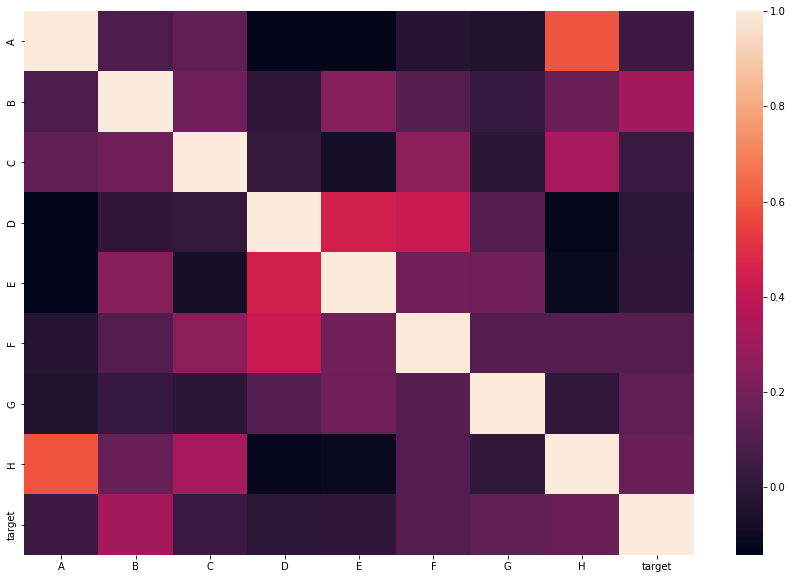

In [71]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr())

In [72]:
X=df.drop(['target'],axis=1)
y=df['target']

X.columns=[x.lower() for x in X.columns]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3, stratify=y)

In [73]:
df_train = X_train.copy()
df_train['target'] = y_train
df_train.head()

,a,b,c,d,e,f,g,h,target
140,0.00,0.117647,-0.125,0.000000,-0.426087,-0.184783,-0.727536,-0.153846,0
241,0.75,-0.705882,-0.125,0.193548,0.191304,-0.021739,0.060870,-0.230769,0
291,-0.50,-0.147059,1.250,-0.709677,-0.426087,-0.086957,-0.423188,1.461538,0
49,1.00,1.000000,0.125,0.161290,1.556522,0.380435,-0.255072,1.000000,0
274,-0.25,0.588235,-0.625,0.032258,1.052174,-0.195652,1.011594,-0.461538,0


### *Come Imbalanced dataset*

In [74]:
classes=df_train['target'].value_counts()
normal_share=round(classes[0]/df_train['target'].count()*100,2)
fraud_share=round(classes[1]/df_train['target'].count()*100, 2)
print("target : {} %".format(normal_share))
print("target : {} %".format(fraud_share))

target : 93.22 %
target : 6.78 %


In [75]:
fig = px.histogram(df_train, x="target", color="target", title="target histogram")
fig.show()

### *Upsampling*

In [76]:
# Upsampling
df_minority_upsampled = resample(df_train[df_train['target'] == 1], 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_train[df_train['target'] == 0]),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_train = pd.concat([df_train[df_train['target'] == 0], df_minority_upsampled])
 
# Display new class counts
df_train.target.value_counts()

0    275
1    275
Name: target, dtype: int64

In [77]:
X_train=df_train.drop(['target'],axis=1)
y_train=df_train['target']

In [78]:
fig = px.histogram(df_train, x="target", color="target", title="target histogram")
fig.show()

# **Model Creation**

## **Linear Models**

### LogisticRegression

Accuracy : 0.7795275590551181
Precision : 0.21212121212121213
Recall : 0.7777777777777778
F1 Score : 0.3333333333333333
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       118
           1       0.21      0.78      0.33         9

    accuracy                           0.78       127
   macro avg       0.60      0.78      0.60       127
weighted avg       0.92      0.78      0.83       127

AUC : 0.7787193973634652


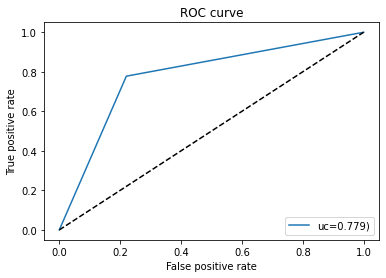

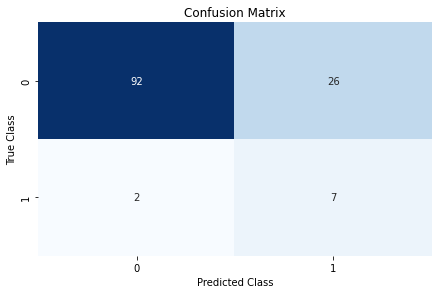

In [79]:
logistic(X_train,X_test,y_train,y_test)

### RidgeClassifier

Accuracy : 0.8267716535433071
Precision : 0.25925925925925924
Recall : 0.7777777777777778
F1 Score : 0.3888888888888889
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       118
           1       0.26      0.78      0.39         9

    accuracy                           0.83       127
   macro avg       0.62      0.80      0.64       127
weighted avg       0.93      0.83      0.86       127

AUC : 0.8041431261770244


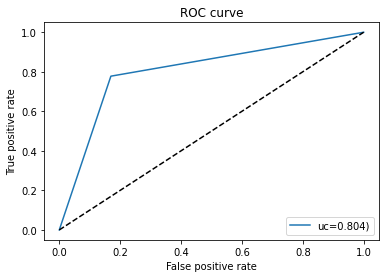

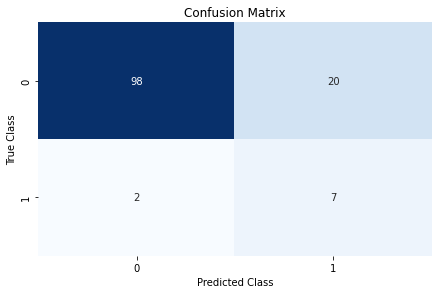

In [80]:
Ridge(X_train,X_test,y_train,y_test)

### SGDClassifier

Accuracy : 0.7952755905511811
Precision : 0.20689655172413793
Recall : 0.6666666666666666
F1 Score : 0.31578947368421056
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       118
           1       0.21      0.67      0.32         9

    accuracy                           0.80       127
   macro avg       0.59      0.74      0.60       127
weighted avg       0.92      0.80      0.84       127

AUC : 0.7358757062146892


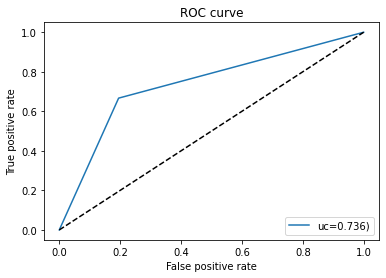

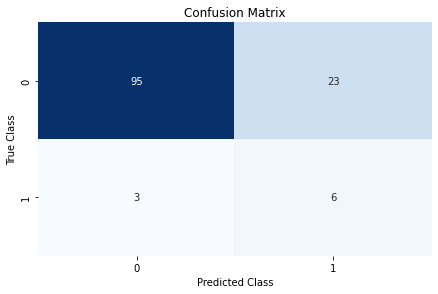

In [81]:
SGD(X_train,X_test,y_train,y_test)

## **Ensemble and Boosting Models**

### RandomForestClassifier

Accuracy : 0.937007874015748
Precision : 1.0
Recall : 0.1111111111111111
F1 Score : 0.19999999999999998
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.11      0.20         9

    accuracy                           0.94       127
   macro avg       0.97      0.56      0.58       127
weighted avg       0.94      0.94      0.91       127

AUC : 0.5555555555555556


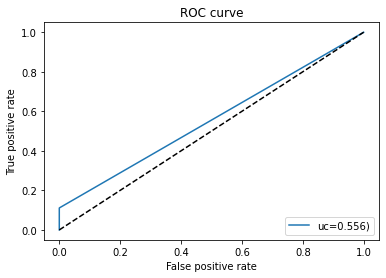

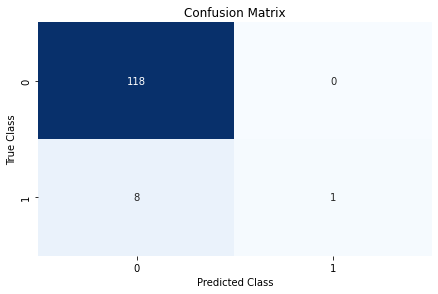

In [82]:
RF(X_train,X_test,y_train,y_test)

### BaggingClassifier

Accuracy : 0.84251968503937
Precision : 0.17647058823529413
Recall : 0.3333333333333333
F1 Score : 0.23076923076923078
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       118
           1       0.18      0.33      0.23         9

    accuracy                           0.84       127
   macro avg       0.56      0.61      0.57       127
weighted avg       0.89      0.84      0.86       127

AUC : 0.6073446327683615


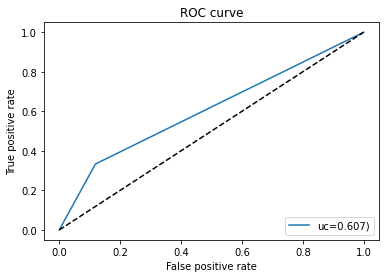

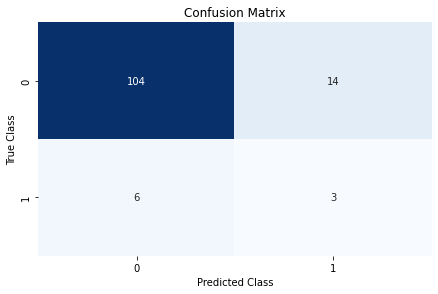

In [83]:
Bagging(X_train,X_test,y_train,y_test)

### AdaBoostClassifier

Accuracy : 0.8740157480314961
Precision : 0.0
Recall : 0.0
F1 Score : 0.0
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       118
           1       0.00      0.00      0.00         9

    accuracy                           0.87       127
   macro avg       0.46      0.47      0.47       127
weighted avg       0.86      0.87      0.87       127

AUC : 0.4703389830508475


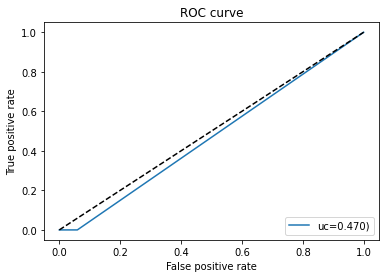

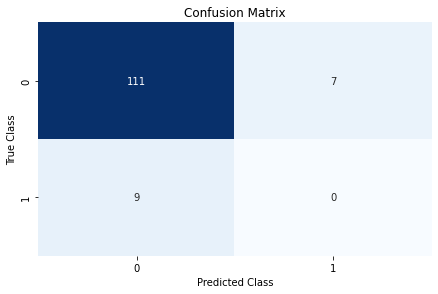

In [84]:
AdaBoost(X_train,X_test,y_train,y_test)

### ExtraTreesClassifier

Accuracy : 0.9291338582677166
Precision : 0.0
Recall : 0.0
F1 Score : 0.0
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       118
           1       0.00      0.00      0.00         9

    accuracy                           0.93       127
   macro avg       0.46      0.50      0.48       127
weighted avg       0.86      0.93      0.90       127

AUC : 0.5


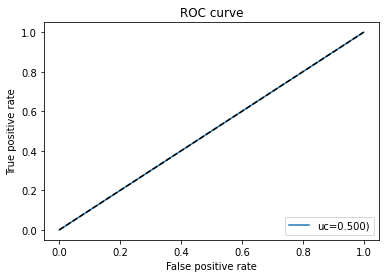

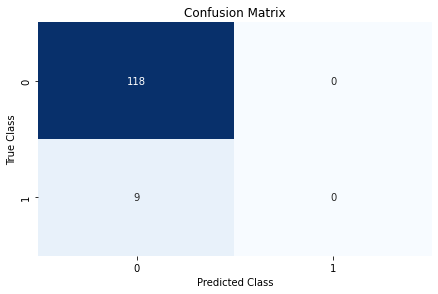

In [85]:
ExtraTrees(X_train,X_test,y_train,y_test)

### GradientBoostingClassifier

Accuracy : 0.9212598425196851
Precision : 0.42857142857142855
Recall : 0.3333333333333333
F1 Score : 0.375
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       118
           1       0.43      0.33      0.38         9

    accuracy                           0.92       127
   macro avg       0.69      0.65      0.67       127
weighted avg       0.91      0.92      0.92       127

AUC : 0.6497175141242937


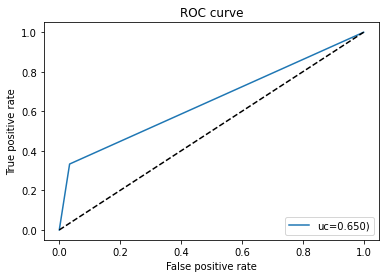

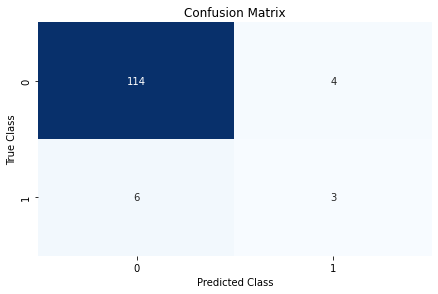

In [86]:
GradientBoosting(X_train,X_test,y_train,y_test)

### StackingClassifier

Accuracy : 0.9291338582677166
Precision : 0.5
Recall : 0.1111111111111111
F1 Score : 0.1818181818181818
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       118
           1       0.50      0.11      0.18         9

    accuracy                           0.93       127
   macro avg       0.72      0.55      0.57       127
weighted avg       0.91      0.93      0.91       127

AUC : 0.5513182674199624


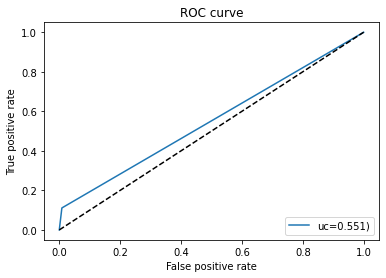

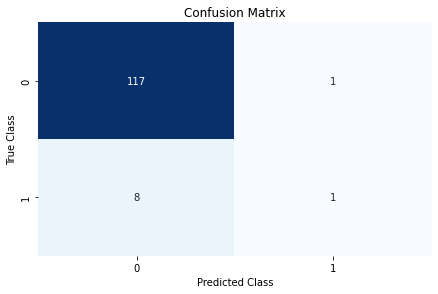

In [87]:
Stacking(X_train,X_test,y_train,y_test)

### XGBoostClassifier

Accuracy : 0.889763779527559
Precision : 0.2222222222222222
Recall : 0.2222222222222222
F1 Score : 0.2222222222222222
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       118
           1       0.22      0.22      0.22         9

    accuracy                           0.89       127
   macro avg       0.58      0.58      0.58       127
weighted avg       0.89      0.89      0.89       127

AUC : 0.5814500941619586


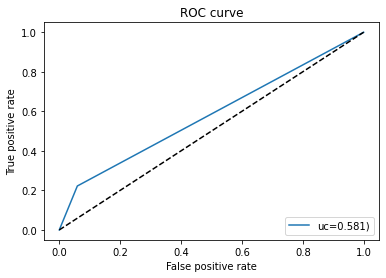

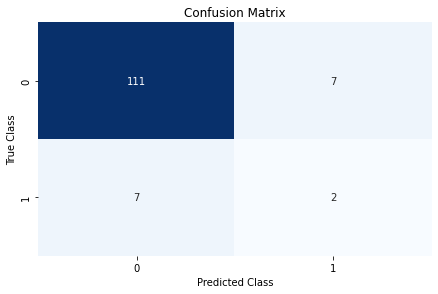

In [88]:
XGBOOST(X_train.values,X_test.values,y_train,y_test)

# **Conclusion**

RidgeClassifier (Linear) has the best score overall as we can see:

It has aroun 82% Accuracy, 25% Precision, 77% Recall, 38% F1 Score, 80% AUC.
We can also see the results for each classifier as well.

PS, in this case we have limited data but if we have much records and data we can tune hyper parameters for better results as well.

